In [25]:
import pandas as pd

raw_df = pd.read_csv("stocks.csv")

# Filter the dataset for MSFT stocks
df = raw_df[raw_df['Name'] == 'MSFT']

df.head()

,date,open,high,low,close,volume,Name
390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


Checking for null values

In [26]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Analyzing the dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 390198 to 391456
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [28]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


Checking for outliers

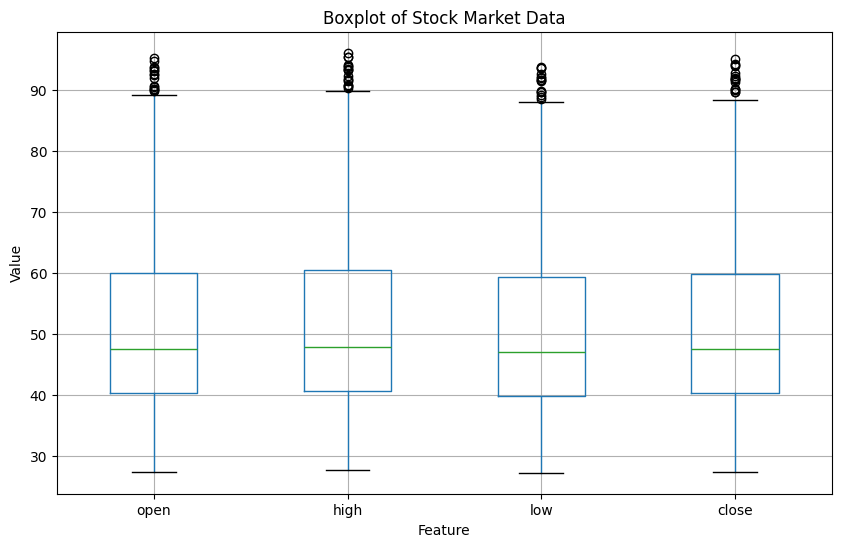

In [40]:
import matplotlib.pyplot as plt

columns = ['open', 'high', 'low', 'close']

df[columns].boxplot(figsize=(10, 6))
plt.title('Boxplot of Stock Market Data')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

normalized_df = pd.DataFrame(normalized_data, columns=['open', 'high', 'low', 'close', 'volume'])

print(normalized_df.head())

KeyError: "None of [Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')] are in the [columns]"